# Uber pickups

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

%matplotlib inline

from tqdm import tqdm
tqdm.pandas()

In [165]:
df = pd.read_csv('./Datasets/uber-raw-data-apr14.csv', infer_datetime_format=True, parse_dates=[0])

# Data prep

In [166]:
df['Hour'] = df['Date/Time'].dt.hour

In [167]:
df['Weekday'] = df['Date/Time'].dt.weekday

In [168]:
df['Day of month'] = df['Date/Time'].dt.day

In [169]:
def split_time(x):
    if x >= 22 or x <= 5:
        return "night"
    elif x >= 6 and x <= 12:
        return "am"
    elif x >= 13 and x <= 17:
        return "pm"
    else:
        return "evening"

In [170]:
def apply_weekday(x):
    if x == 0:
        return "monday"
    elif x == 1:
        return "tuesday"
    elif x == 2:
        return "wednesday"
    elif x == 3:
        return "thursday"
    elif x == 4:
        return "friday"
    elif x == 5:
        return "saturday"
    else:
        return "sunday"

In [171]:
def count_rows(rows):
    return len(rows)

In [172]:
df['Period'] = df['Hour'].progress_apply(lambda x: split_time(x))

100%|██████████| 564516/564516 [00:00<00:00, 828903.38it/s]


In [173]:
df['Day'] = df['Weekday'].progress_apply(lambda x: apply_weekday(x))

100%|██████████| 564516/564516 [00:00<00:00, 856191.01it/s]


In [174]:
df['Day - Period'] = df[['Day', 'Period']].progress_apply(lambda x: '_'.join(x), axis=1)

100%|██████████| 564516/564516 [00:04<00:00, 118048.44it/s]


# Dataviz

## Day of month

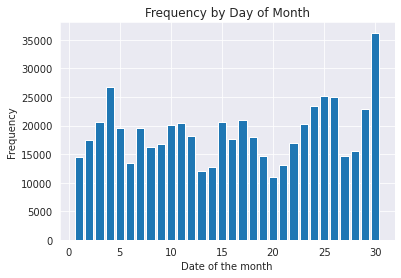

In [175]:
plt.hist(df['Day of month'], bins=30, rwidth=.8, range=(0.5, 30.5))
plt.xlabel('Date of the month')
plt.ylabel('Frequency')
plt.title('Frequency by Day of Month')
plt.show()

## Hour of the day

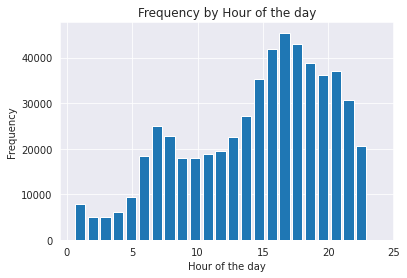

In [176]:
plt.hist(df['Hour'], bins=24, rwidth=.8, range=(0.5, 24))
plt.xlabel('Hour of the day')
plt.ylabel('Frequency')
plt.title('Frequency by Hour of the day')
plt.show()

## Weekday

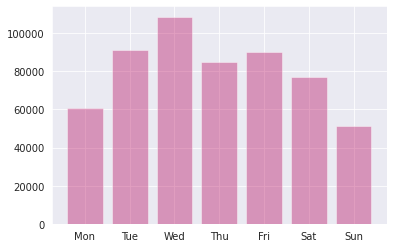

In [177]:
plt.hist(df.Weekday, bins=7, range =(-.5,6.5), rwidth=.8, color='#BA1264', alpha=.4)
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
plt.show()

## Cross analysis by hour and day of week

In [178]:
weekday_hour = df.groupby('Weekday Hour'.split()).apply(count_rows).unstack()

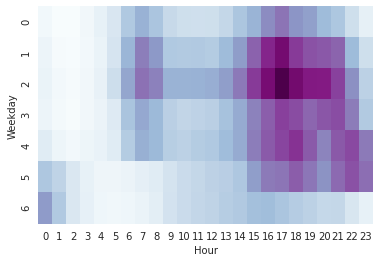

In [179]:
sns.heatmap(weekday_hour, cbar=False, cmap='BuPu')

## By Latitude & Longitude

**Latitude**

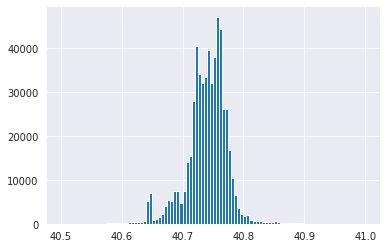

In [180]:
plt.hist(df['Lat'], bins=100, range = (40.5, 41))
plt.show()

**Longitude**

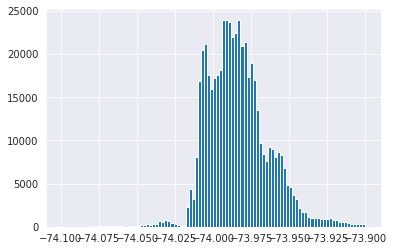

In [181]:
plt.hist(df['Lon'], bins=100, range = (-74.1, -73.9));
plt.show()

**Double Histogram**

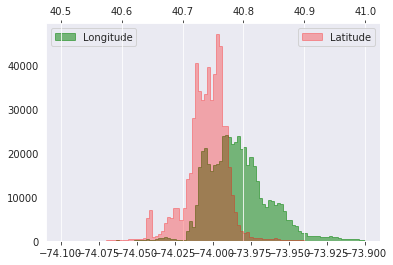

In [182]:
plt.hist(df['Lon'], bins=100, range = (-74.1, -73.9), color='g', alpha=.5, label = 'Longitude', histtype='step', fill=True)
plt.grid()
plt.legend(loc='upper left')
plt.twiny()
plt.hist(df['Lat'], bins=100, range = (40.5, 41), color='r', alpha=.3, label = 'Latitude', histtype='step', fill=True)
plt.legend(loc='best')

# Geoplot

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(df['Lon'], df['Lat'], '.', ms=1, alpha=.5)
plt.xlim(-74.2, -73.7)
plt.ylim(40.7, 41)
plt.savefig("./png_geopandas/geoplot.png")